In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter
import re
import pdf_parse_functions
from transformers import pipeline

In [5]:
from operator import itemgetter
import fitz
import spacy
from collections import Counter
import re


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
summa = pipeline("summarization")
sentiment_analysis = pipeline('sentiment-analysis')

In [8]:
datapath = "/home/helix/Documents/UNAIDS/code/unaids_branch/Demo/pdfs/" 
pdfnames = os.listdir(datapath)

In [9]:
pdfnames

['ToR_GAM_AI Data POC_Silo AI Oy.pdf',
 'colombia.pdf',
 'kenya2.pdf',
 'Zambia_IBBS_Final Report_May 2018.pdf',
 'SAIDS3.pdf',
 'SummaryBrazil.pdf',
 'SAIDS.pdf',
 'Caribbean.pdf',
 'ARG.pdf',
 'SAIDS.txt',
 'centralAsia.pdf',
 'Cameroon Report_July 4 2014.pdf',
 'SAIDS1.pdf',
 'LimePaper.pdf',
 'Cameroon2014.pdf',
 'LimeVsShap.pdf',
 'LimeMedium.pdf',
 'Libro TRANS 2016.pdf']

# Central Asia:

In [11]:
language = "english"

if language == "spanish":
    keywords = ('sida', 'sexo', 'ETS')
    listOfStrings = ['TABLAS' , 'FIGURAS', 'figura', 'tabla', '...']
else:
    keywords = ('HIV', 'gender', 'STI')
    listOfStrings = ['TABLES' , 'FIGURE', 'figure', 'table', '...']

In [12]:
paragraphs = pdf_parse_functions.pdf_parser(datapath+pdfnames[2])
paragraphs_with_key_words = pdf_parse_functions.get_paragraphs_with_key_words(paragraphs, keywords)

In [9]:
#paragraphs_with_key_words

In [13]:
# Clean the paragraphs:
word_list = []
for para in paragraphs_with_key_words:
    if any(w in para['heading'] for w in listOfStrings)  == True:
        pass
    else:
        word_list.append(para)

In [14]:
paragraphs_with_key_words = word_list

In [15]:
df = pd.DataFrame.from_dict(paragraphs_with_key_words)

In [16]:
df

,heading,text,key_words_info,importance
0,6. Conclusions,The costing of HIV interventions in this study...,"{'key_words': ('HIV', 'gender', 'STI'), 'count...",17
1,Executive Summary,"In 2016, the Ministry of Health (MOH) updated ...","{'key_words': ('HIV', 'gender', 'STI'), 'count...",6
2,5.7 HIV testing services for the general popul...,"Under the NASCOP scenario, HIV testing service...","{'key_words': ('HIV', 'gender', 'STI'), 'count...",5
3,List of Figures,"Figure E1: Relative Costs for NCD Screening, b...","{'key_words': ('HIV', 'gender', 'STI'), 'count...",4
4,5.5 Prevention of mother-to-child transmission,Figure 9 shows the estimated cost of PMTCT usi...,"{'key_words': ('HIV', 'gender', 'STI'), 'count...",4
5,2.Summary of the 2016 HIV Guidelines on the Us...,This section summarises key programme areas co...,"{'key_words': ('HIV', 'gender', 'STI'), 'count...",3
6,5.9 Medicines for opportunistic diseases,Figure 17 shows that the estimated cost of med...,"{'key_words': ('HIV', 'gender', 'STI'), 'count...",3
7,5.6 Pre-exposure prophylaxis,Figure 11 shows the cost of providing PrEP und...,"{'key_words': ('HIV', 'gender', 'STI'), 'count...",2
8,5.8 NCDs and other co-morbidity,The 2016 ART guidelines recommend screening am...,"{'key_words': ('HIV', 'gender', 'STI'), 'count...",2
9,Acknowledgments,This assessment was jointly conducted by the N...,"{'key_words': ('HIV', 'gender', 'STI'), 'count...",1


In [15]:
#df.to_csv('/home/helix/Documents/UNAIDS/Development/DemoFlask2/SA.csv', index=False)

In [16]:
#df[df['heading'] == '2) Gender'].text

In [17]:
len(paragraphs_with_key_words)

17

In [18]:
paragraphs_with_key_words[0]['text']

'The costing of HIV interventions in this study is based on 2016 HIV guidelines and considers two scenarios: NASCOP and Standard. The NASCOP scenario was based on national HIV programme targets towards achievement of 90-90-90, and the Standard scenario was based on the assumption that the guidelines would be fully implemented as spelt out in the 2016 ART guidelines. In the NASCOP scenario, the population base is assumed to be constant for the four-year costing projections, while the Standard scenario adjusts its population in need to consider incidence, mortality, and population growth rates. However, both scenarios considered two key assumptions: the gains obtained from the reduction in HIV mortality and the reduction in HIV incidence rates. Findings have shown that the average annual cost of putting a patient on ARVs is Ksh 12,032.36 (US$115.7). The Standard scenario costs more than the NASCOP scenario, although differences vary across programme areas. The key biomedical cost drivers

In [19]:
summa(paragraphs_with_key_words[0]['text'])

[{'summary_text': ' The costing of HIV interventions in this study is based on 2016 HIV guidelines and considers two scenarios: NASCOP and Standard . Findings have shown that the average annual cost of putting a patient on ARVs is Ksh 12,032.36 (US$115.7) The key biomedical cost drivers in both scenarios were ARTs and laboratory management . Kenya must explore channels for financing its increased need for HIV care and treatment .'}]

In [11]:
# Loop to automatize this process
lista = []
summaries = []
for i in range(0,len(paragraphs_with_key_words)):
     lista.append(paragraphs_with_key_words[i]['text'])
    
     summaries.append(summa(paragraphs_with_key_words[i]['text']))


Your max_length is set to 142, but you input_length is only 128. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 137. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 138. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 54. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 76. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 94. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 63. You might consi

Sentiment analyses


In [15]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["SummariesDB"]

In [16]:
mycol = mydb["summaries"]

In [29]:
#x = mycol.insert_many(summaries)
for i in summaries:
    x = mycol.insert_one(i[0])

In [45]:
stuff = mycol.find()

In [46]:
summaries = []
for i in stuff:
    summaries.append(i)

In [38]:
summaries[0]['summary_text']


' Eastern European and Central Asian societies display traditional gender norms where men are expected to ignore or even seek risks associated with IDU or high-risk sex . Women often lack the power to choose their sexual relations and their bodies may be considered as potential transactional goods . The threat of HIV has not yet been taken seriously by governments or by the general population .'

In [39]:
sentiment_analysis((summaries[0]['summary_text']))[0]

{'label': 'NEGATIVE', 'score': 0.9944685101509094}

In [50]:
for i in summaries:
    print(i['summary_text'])
 

    result = sentiment_analysis((i['summary_text']))[0]
    break
        
 

 Eastern European and Central Asian societies display traditional gender norms where men are expected to ignore or even seek risks associated with IDU or high-risk sex . Women often lack the power to choose their sexual relations and their bodies may be considered as potential transactional goods . The threat of HIV has not yet been taken seriously by governments or by the general population .


In [51]:
result

{'label': 'NEGATIVE', 'score': 0.9944685101509094}

In [91]:
https://www.viralml.com/video-content.html?v=WmyYyOtZwzs

In [52]:
def plot(summaries):
    label = []
    score = []
    for i in summaries:
    
        result = sentiment_analysis((i['summary_text']))[0]
        label.append(result['label'])
        score.append(result['score'])   
    
    data_tuples = list(zip(label,score))
    df = pd.DataFrame(data_tuples, columns=['label','score'])

    posit = df[df["label"] == "POSITIVE"]
    negat = df[df["label"] == "NEGATIVE"]
    means = [posit['score'].mean(), negat['score'].mean() ]
    labe = ["POSITIVE", "NEGATIVE"]

    fig = plt.figure()


    ax = fig.add_axes([0,0,1,1])
    ax.set_ylim([0,1])
    ax.bar(labe, means)
    ax.set_xlabel("sentiment")
    ax.set_title("Article 2")
    ax.set_ylabel("Mean score Latin America")
    plt.show()

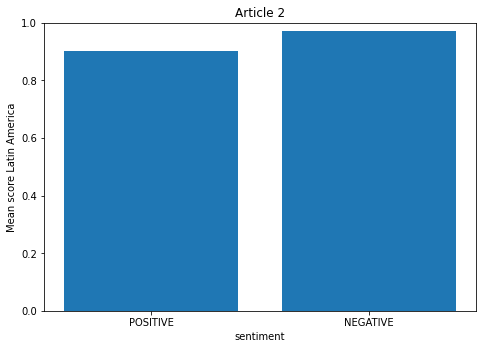

In [53]:
plot(summaries)

# MongoDB

In [22]:
country = "colombia"

In [44]:
# importing module
from pymongo import MongoClient
  
# creation of MongoClient
client=MongoClient()
  
# Connect with the portnumber and host
client = MongoClient("mongodb://localhost:27017/")
  
# Access database
mydatabase = client["UNAIDS_db"]
  
# Access collection of the database
mycollection = mydatabase["summaryTable"]
 

In [54]:
for para in paragraphs_with_key_words:
    mydatabase.summaryTable.insert_one(para)

In [55]:
cursor = mycollection.find()
for record in cursor:
    print(record)

{'_id': ObjectId('6093c92a2799b9616a6f8a11'), 'heading': '6. Conclusions ', 'text': 'The costing of HIV interventions in this study is based on 2016 HIV guidelines and considers two scenarios: NASCOP and Standard. The NASCOP scenario was based on national HIV programme targets towards achievement of 90-90-90, and the Standard scenario was based on the assumption that the guidelines would be fully implemented as spelt out in the 2016 ART guidelines. In the NASCOP scenario, the population base is assumed to be constant for the four-year costing projections, while the Standard scenario adjusts its population in need to consider incidence, mortality, and population growth rates. However, both scenarios considered two key assumptions: the gains obtained from the reduction in HIV mortality and the reduction in HIV incidence rates. Findings have shown that the average annual cost of putting a patient on ARVs is Ksh 12,032.36 (US$115.7). The Standard scenario costs more than the NASCOP scenari

In [57]:
# Find first document
x = mycollection.find_one()
print(x)

{'_id': ObjectId('6093c92a2799b9616a6f8a11'), 'heading': '6. Conclusions ', 'text': 'The costing of HIV interventions in this study is based on 2016 HIV guidelines and considers two scenarios: NASCOP and Standard. The NASCOP scenario was based on national HIV programme targets towards achievement of 90-90-90, and the Standard scenario was based on the assumption that the guidelines would be fully implemented as spelt out in the 2016 ART guidelines. In the NASCOP scenario, the population base is assumed to be constant for the four-year costing projections, while the Standard scenario adjusts its population in need to consider incidence, mortality, and population growth rates. However, both scenarios considered two key assumptions: the gains obtained from the reduction in HIV mortality and the reduction in HIV incidence rates. Findings have shown that the average annual cost of putting a patient on ARVs is Ksh 12,032.36 (US$115.7). The Standard scenario costs more than the NASCOP scenari

In [58]:
x.keys()

dict_keys(['_id', 'heading', 'text', 'key_words_info', 'importance', 'country'])

In [64]:
# Filtering the Quantities greater
# than 40 using query.
cursor = mycollection.find({"importance": {"$lt": 10}})

In [65]:
print("The data having Quantity greater than 40 is:")
for record in cursor: 
    print(record) 

The data having Quantity greater than 40 is:
{'_id': ObjectId('6093c92a2799b9616a6f8a12'), 'heading': 'Executive Summary ', 'text': 'In 2016, the Ministry of Health (MOH) updated Kenya’s national HIV guidelines to provide guidance on the use of antiretrovirals (ARVs) to treat and prevent HIV infection. To inform implementation and resource mobilisation, the MOH needed to understand the costing implications of implementing the new guidelines. This created the need for a study to estimate the costs of implementing the new guidelines, based on the country targets and covering all known people living with HIV in Kenya. This study adopted a micro-costing approach using population data from 2015 HIV revised estimates. The study considered two costing scenarios—the “NASCOP scenario,” based on NASCOP (National AIDS/STI Control Programme) targets to achieve the UNAIDS 90-90-90 targets; and the “Standard scenario,” based on full adoption of the new guidelines. The results show that the average a

In [ ]:
filter = { 'appliance': 'tv' }